In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## 1  线性回归模型

给定含有1000条记录的数据集`mlm.csv`，其中每条记录均包含两个自变量`x`,`y`和一个因变量`z`，它们之间存在较为明显的线性关系。

**任务：请对数据进行三维可视化分析，并训练出良好的线性回归模型。**

### 三维可视化分析

三维可视化分析如下，由图可以看出，具有较为明显的线性关系

In [2]:
mlm_data = pd.read_csv("mlm.csv")

Text(0.5, 0, 'z')

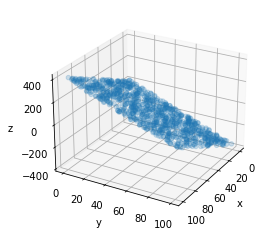

In [3]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(mlm_data["x"], mlm_data["y"], mlm_data["z"], alpha=0.2)
ax.view_init(25, 30)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

### 线性回归模型训练

#### 使用正规方程法（最小二乘法）进行计算

In [4]:
class linear_regression:
    def __init__(self):
        self.w = np.zeros((2, 1))
        self.b = 0

    def fit(self, x, z):
        self.w = np.linalg.inv(x.T @ x) @ x.T @ z
        self.b = (z - x @ self.w).mean()

    def predict(self, x):
        return x @ self.w + self.b

In [5]:
model = linear_regression()
model.fit(mlm_data[["x", "y"]].to_numpy(), mlm_data["z"].to_numpy())
predicted_z = model.predict(mlm_data[["x", "y"]])

In [6]:
print(f"w is {model.w}, b is {model.b}")

w is [ 4.05875628 -3.73335026], b is 0.610810550030684


#### 在图中，将我们计算出的模型绘制出来

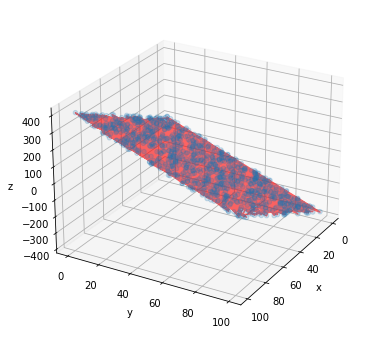

In [7]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(mlm_data["x"], mlm_data["y"], mlm_data["z"], alpha=0.2)
ax.view_init(25, 30)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.plot(mlm_data.x, mlm_data.y, predicted_z, c="red", alpha=0.6)

#### 最后，我们计算数据的平均绝对值差来评估模型
模型预测性能良好

In [8]:
MAE = np.abs((predicted_z - mlm_data.z)).mean()
print(MAE)

1.8650485081680521


## 2  非线性多分类器

鸢尾花数据集`iris.csv`含有150条记录，每条记录包含萼片长度`sepal length`、萼片宽度`sepal width`、
花瓣长度`petal length`和花瓣宽度`petal width`四个数值型特征，以及它的所属类别`class`（可能为`Iris-setosa`,`Iris-versicolor`,`Iris-virginica`三者之一）。

**任务：请利用该数据集训练出一个良好的非线性分类器。**

In [9]:
iris_data = pd.read_csv("iris.csv")
iris_data.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### 数据预处理

并分出测试集和训练集

array([[<AxesSubplot:title={'center':'sepal length'}>,
        <AxesSubplot:title={'center':'sepal width'}>,
        <AxesSubplot:title={'center':'petal length'}>],
       [<AxesSubplot:title={'center':'petal width'}>,
        <AxesSubplot:title={'center':'class_num'}>,
        <AxesSubplot:title={'center':'is0'}>],
       [<AxesSubplot:title={'center':'is1'}>,
        <AxesSubplot:title={'center':'is2'}>, <AxesSubplot:>]],
      dtype=object)

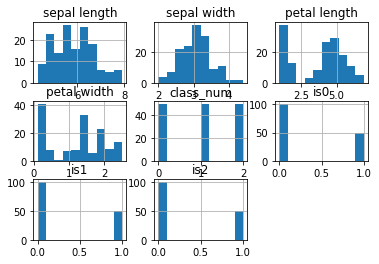

In [10]:
def get_class(name: str):
    if name == "Iris-setosa":
        return 0
    elif name == "Iris-versicolor":
        return 1
    else:
        return 2


class_num = []
is0 = []
is1 = []
is2 = []
for _, row in iris_data.iterrows():
    class_num.append(get_class(row["class"]))
    if class_num[-1] == 0:
        is0.append(1)
        is1.append(0)
        is2.append(0)
    elif class_num[-1] == 1:
        is0.append(0)
        is1.append(1)
        is2.append(0)
    else:
        is0.append(0)
        is1.append(0)
        is2.append(1)
iris_data["class_num"] = class_num
iris_data["is0"] = is0
iris_data["is1"] = is1
iris_data["is2"] = is2
iris_data.hist()

#### 下面写多分类神经网络

In [11]:
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split

In [12]:
x_data = iris_data[["sepal length", "sepal width", "petal length","petal width"]].to_numpy()
y_data = iris_data[["is0", "is1", "is2"]].to_numpy()
x_data = normalize(X=x_data, axis=1)
y_data = normalize(X=y_data, axis=1)
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data,test_size=0.33,random_state=0)

In [13]:
def cross_entropy(y, p):
    return -np.sum(y * np.log(p),axis=0)


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def back_sigmoid(y):
    return (1 - y) * y


def softmax(x):
    e_x = np.exp(x - np.max(x))
    return (e_x.T/e_x.sum(axis=1)).T

In [14]:
# Ref: https://github.com/microsoft/ai-edu/tree/master/A-%E5%9F%BA%E7%A1%80%E6%95%99%E7%A8%8B/A2-%E7%A5%9E%E7%BB%8F%E7%BD%91%E7%BB%9C%E5%9F%BA%E6%9C%AC%E5%8E%9F%E7%90%86/SourceCode/ch11-NonLinearMultipleClassification
class multi_classifier:
    def __init__(self, num_input, num_hidden, num_output):
        self.w1 = np.random.random((num_input, num_hidden))
        self.b1 = np.random.random(num_hidden)
        self.w2 = np.random.random((num_hidden, num_output))
        self.b2 = np.random.random(num_output)
        self.loss_arr=[]

    def forward(self, batch_x):
        self.Z1 = batch_x @ self.w1 + self.b1
        self.A1 = sigmoid(self.Z1)
        self.Z2 = self.A1 @ self.w2 + self.b2
        self.A2 = softmax(self.Z2)
        self.output = self.A2
        return self.output

    def backward(self, batch_x, batch_y, batch_a):
        m = batch_x.shape[0]
        dZ2 = self.A2 - batch_y
        self.dw2 = self.A1.T @ dZ2 / m
        self.db2 = np.sum(dZ2, axis=0) / m
        dA1 = dZ2 @ self.w2.T
        dZ1 = back_sigmoid(self.A1) * dA1
        self.dw1 = batch_x.T @ dZ1 / m
        self.db1 = np.sum(dZ1, axis=0) / m

    def update(self, lr):
        self.w1 -= lr * self.dw1
        self.b1 -= lr * self.db1
        self.w2 -= lr * self.dw2
        self.b2 -= lr * self.db2

    def train(self, x, y, lr=0.1, batch_size=10, max_epoch=10000, max_iteration=100,times=100):
        loss = 0
        for epoch in range(max_epoch):
            m = x.shape[0]
            permu = np.random.permutation(m)
            x = x[permu]
            y = y[permu]
            for iteration in range(max_iteration):
                if (iteration + 1) * batch_size >= m:
                    break
                batch_x = x[batch_size * iteration : batch_size * (iteration + 1)]
                batch_y = y[batch_size * iteration : batch_size * (iteration + 1)]
                batch_a = self.forward(batch_x)
                self.backward(batch_x, batch_y, batch_a)
                self.update(lr)
            if epoch%times==0:
                self.loss_arr.append(cross_entropy(y_data,self.forward(x_data)).sum())
model = multi_classifier(4, 10, 3)
model.train(x_train, y_train)

Text(0.5, 0, 'Epochs')

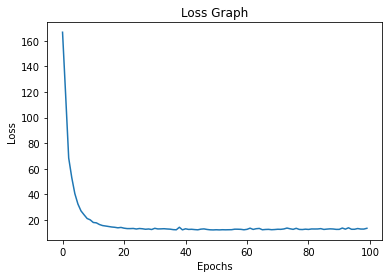

In [15]:
plt.plot(model.loss_arr)
plt.title("Loss Graph")
plt.ylabel("Loss")
plt.xlabel("Epochs")

#### 由上图可以看出，该神经网络已经能取得比较好的收敛效果，loss稳定在较低的水平，下面计算准确率

In [16]:
y_predict=model.forward(x_test)
y_predict=np.around(y_predict)
y_iferror = np.abs(y_predict-y_test).sum(axis=0)
error_rate = y_iferror/y_data.shape[0]
for i in range(3):
    print(f"model has the accuracy rate of {(1-error_rate)[i]:0.3} in predicting class {i+1}")

model has the accuracy rate of 1.0 in predicting class 1
model has the accuracy rate of 0.987 in predicting class 2
model has the accuracy rate of 0.987 in predicting class 3


可见，该模型有较高的准确率